# **Project Name**    - "Integrated Retail Analytics for Store Optimization"



##### **Project Type**    -EDA + Regression + Unsupervised Learning
##### **Contribution**    - Individual

# **Project Summary -**

The "Integrated Retail Analytics for Store Optimization" project is designed to learn about sales patterns and enhance performance in retail stores. In the competitive retail market today, it is imperative to know why some stores perform better than others. The project seeks to analyze weekly sales data, economic environments outside, and store characteristics to learn insightful information that can guide businesses to make wiser decisions.

We dealt with three data sets: the first one held weekly sales figures for all stores and departments, the second held extra features like weather, fuel price, CPI, and unemployment rate, and the third held information regarding the stores themselves, such as store type and size. These data sets were merged together to provide one single, structured perspective of store performance over time.

Data cleaning and preparation were the initial steps to the project. We combined all the datasets based on common keys such as Store, Date, and IsHoliday. We then treated missing values, changed date formats to a standard one, and created new time-based features such as Month, Week, and Year. These were all done to ensure that the data was suitable for modeling and analysis.

Through exploratory data analysis (EDA), we investigated the ways in which sales varied by period, how stores of each type performed, and what effect holidays or seasonal cycles had on sales. We used visualizations to gain better insights into trends and patterns. For example, we observed that sales normally increased during holidays and also that larger stores experienced higher weekly sales. Variations in performances were also observed across store types, with Type A stores generally performing better.

To determine abnormal sales behavior, we employed anomaly detection with Z-scores. This enabled us to identify weeks with anomalously high or low sales that could not be explained by normal trends. Some of these anomalies were associated with holidays or one-off markdowns, while others might need further analysis.

We then proceeded to create a machine learning model to forecast weekly sales. Because the target variable (Weekly_Sales) is a continuous variable, we employed regression methods in the form of a Random Forest Regressor. The model was trained based on various features such as economic variables, store-specific features, and time-related variables. Once the model was trained, we tested it with typical metrics such as RMSE, MAE, and R². The model performed well and was successful in accounting for most of the variation in weekly sales, so it would be appropriate to use for future performance forecasting.

Part of the unsupervised learning was the store segmentation done through KMeans clustering. This brought similar stores together according to average sales and store size. This kind of segmentation can assist retailers in developing targeted strategies for various types of stores rather than handling all locations uniformly.

While this project did not involve customer-level data, we touched on how market basket analysis may be incorporated in the future when transaction-level data is obtained. This would enable us to identify product associations and construct improved cross-selling plans.

In summary, this project integrates data analysis and machine learning to inform more effective retail decision-making. It identifies best-performing stores, reveals trends over time, identifies anomalous events, and predicts sales. The approach in this project is transferable to real-world retail environments and can assist businesses with the ability to operate more profitably and efficiently.

# ** Project Statement **  
This project is all about digging into retail sales data—think sales numbers, store quirks, and a bunch of economic stuff like gas prices and unemployment rates. The big idea? Squeeze out hidden trends that actually matter when you’re running a store: how you stock shelves, schedule employees, launch sales, and, you know, try not to lose money. It’s not just number-crunching for the sake of it; it’s about finding the secret sauce that separates the stores killing it from the ones just scraping by.

We’re talking everything from how holidays throw sales out of whack to why some stores sell more when it’s freezing outside, and others tank. The plan is to spot the patterns—weekly, monthly, or those weird spikes that make you go, “Wait, what happened here?” Plus, we’re grouping similar stores together, so you can see which ones are part of the cool crowd and which ones need some TLC.

We’re not just tossing machine learning at the wall to see what sticks, either. There’s some good old-fashioned exploring and clustering to get a grip on what’s actually happening. It’s about making predictions, sure, but also serving up real advice on what’s driving customers—and what’s just noise.

Bottom line: this project is like the Swiss Army knife for retail analytics. It helps businesses make smarter moves, keep shoppers happy, and hopefully make a little more cash, all powered by data instead of gut feelings.


# ** Business Objective ** 
Here’s the mission: predict weekly sales for every store and department. That’s the headline. But it’s not just forecasting for fun—this is about catching weird sales blips, flagging stores that are crushing it (or tanking), and making sure businesses actually know why stuff’s selling (or not). That way, when it’s time to order stock, plan a promo, or bring in extra staff for Black Friday chaos, they’re not flying blind. Spotting the patterns and the oddballs helps companies stay one step ahead, especially when everyone else is panicking about the next holiday rush or economic curveball.

What We Know About the Dataset  
We’ve got three main data sources here, and they fit together like puzzle pieces. The first one logs weekly sales by store and department, and even tells you if that week includes a big holiday (because, let’s face it, holidays always mess with retail). Next up, there’s a set with economic and environmental stuff—temperature, fuel prices, consumer price index, unemployment. Basically, all the stuff that makes people open or close their wallets. Last, we’ve got the store info: what type (A, B, or C, which is kind of like retail Hogwarts houses), and how big the place is. Mash it all together, and you’ve got years’ worth of data, perfect for spotting trends and weird seasonal stuff.



# ** Variable Description ** 
The data’s got a mix of numbers and categories. Each row? That’s a single store’s weekly performance for a department. “Store” and “Dept” tell you who and where. “Date” keeps track of when. “Weekly_Sales” is the biggie—that’s what everyone cares about. “IsHoliday” flags those crazy weeks when everyone’s panic-buying. Then you’ve got Temperature, Fuel_Price, CPI, and Unemployment, to see what’s happening in the world outside the store. “Type” and “Size” show what kind of store you’re dealing with. Oh, and we can break out Month, Week, and Year from the date for extra seasonal detective work. Sometimes, there’s even a “Sales_zscore” column, which is just a fancy way of saying, “Hey, this week was way off the average—maybe look into it.”


# **GitHub Link -**

# ***Let's Begin !***

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import joblib        #Save the trained model efficiently and  Load the saved model using joblib for quick reuse


# Step 2: Load Datasets

In [2]:
sales_df = pd.read_csv("sales data-set.csv")
features_df = pd.read_csv("Features data set.csv")
stores_df = pd.read_csv("stores data-set.csv")


# Step 3: Merge Datasets

In [3]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"], dayfirst=True)
features_df["Date"] = pd.to_datetime(features_df["Date"], dayfirst=True)

merged_df = sales_df.merge(features_df, on=["Store", "Date", "IsHoliday"])
merged_df = merged_df.merge(stores_df, on="Store")


# Step 4: Data Preprocessing

In [4]:
merged_df = merged_df.sort_values(by="Date")
merged_df.fillna(method='ffill', inplace=True)
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week.astype(int)
merged_df['Year'] = merged_df['Date'].dt.year

# Dataset Overview 

In [5]:
# show here First 5 rows of the cleaned dataset
print("Preview of merged dataset:")
display(merged_df.head())

# Dataset information
print("\nData Types and Non-Null Count:")
merged_df.info()

# Summary of the dataset statistics
print("\nSummary Statistics:")
display(merged_df.describe())

# Check for missing values in the dataset which are show here
print("\nMissing Values per Column:")
print(merged_df.isnull().sum())


Preview of merged dataset:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010
277665,29,5,2010-02-05,15552.08,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,B,93638,2,5,2010
277808,29,6,2010-02-05,3200.22,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,B,93638,2,5,2010
277951,29,7,2010-02-05,10820.05,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,B,93638,2,5,2010
278094,29,8,2010-02-05,20055.64,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,B,93638,2,5,2010



Data Types and Non-Null Count:
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     151432 non-null  float64       
 8   MarkDown2     151432 non-null  float64       
 9   MarkDown3     151432 non-null  float64       
 10  MarkDown4     151432 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object    

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Week,Year
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,151432.000000,151432.000000,151432.000000,151432.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,7250.447177,2493.126347,1405.339319,3288.487812,4628.975079,171.201947,7.960289,136727.915739,6.449510,25.826762,2010.968591
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,40.000000,4.360000,499.880000,1878.440000,132.022667,6.891000,93638.000000,4.000000,14.000000,2010.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,129.200000,22.550000,1450.130000,3359.450000,182.318780,7.866000,140167.000000,6.000000,26.000000,2011.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,651.770000,100.040000,3529.360000,5563.800000,212.416993,8.572000,202505.000000,9.000000,38.000000,2012.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000,52.000000,2012.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8294.358964,8242.524001,9532.450304,6101.569832,5962.887455,39.159276,1.863296,60980.583328,3.243217,14.151887,0.796876



Missing Values per Column:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270138
MarkDown2       270138
MarkDown3       270138
MarkDown4       270138
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
Week                 0
Year                 0
dtype: int64


# Step 5: EDA – Sample Visualizations

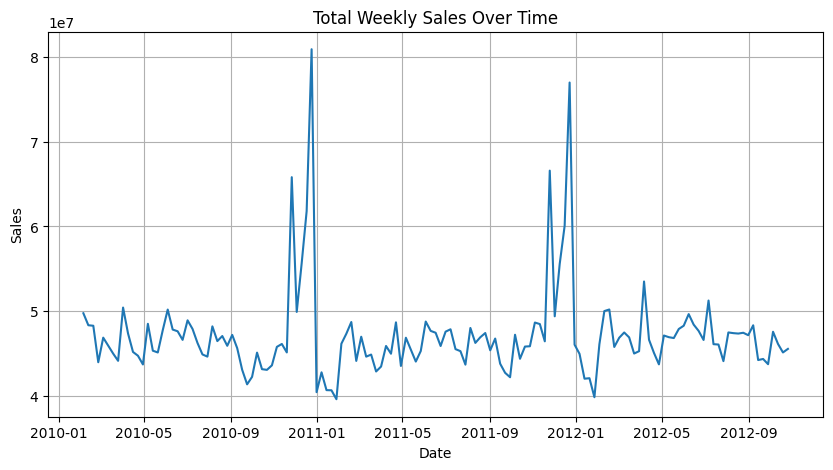

In [6]:
# chart 1 - "Total Weekly Sales Over Time"

plt.figure(figsize=(10,5))
sns.lineplot(data=merged_df.groupby("Date")["Weekly_Sales"].sum())
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


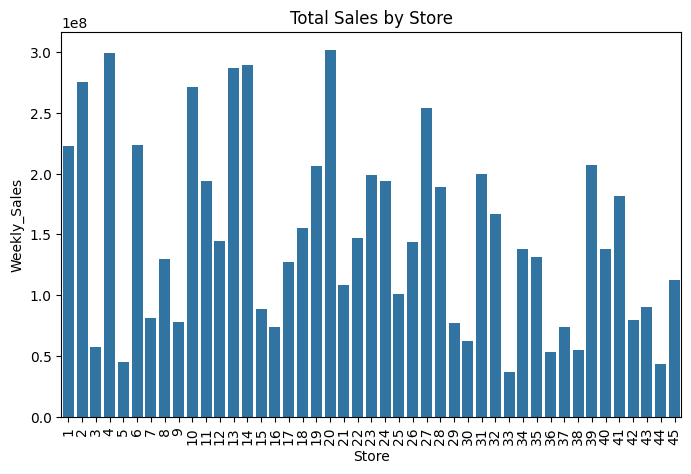

In [23]:
# chart 2 - "Total Sales by Store"

plt.figure(figsize=(8,5))
sns.barplot(data=merged_df.groupby("Store")["Weekly_Sales"].sum().reset_index(), x="Store", y="Weekly_Sales")
plt.title("Total Sales by Store")
plt.xticks(rotation=90)
plt.show()


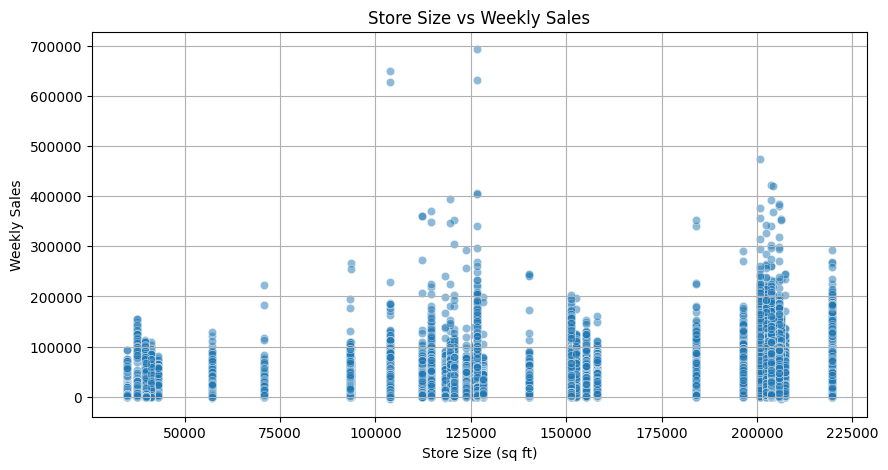

In [7]:
# chart 3 - " Store Size vs Weekly Sales"

plt.figure(figsize=(10, 5))  
sns.scatterplot(data=merged_df, x='Size', y='Weekly_Sales', alpha=0.5)
plt.title("Store Size vs Weekly Sales")
plt.xlabel("Store Size (sq ft)")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


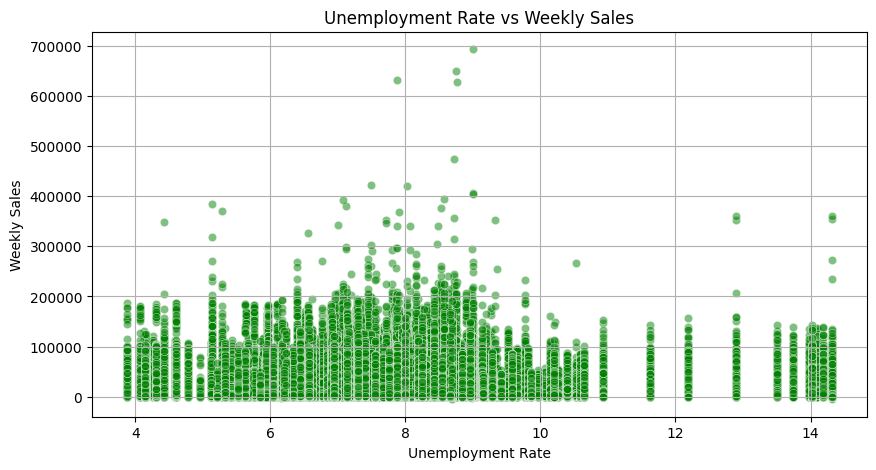

In [8]:
# chart 4 - " Unemployment Rate vs Weekly Sales"

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x='Unemployment', y='Weekly_Sales', alpha=0.5, color='green')
plt.title("Unemployment Rate vs Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


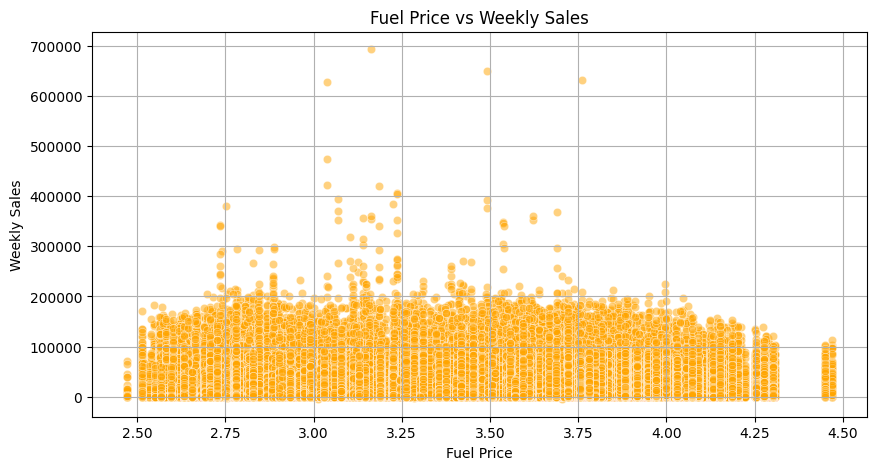

In [9]:
# chart 5 - " Fuel Price vs Weekly Sales"

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x='Fuel_Price', y='Weekly_Sales', alpha=0.5, color='orange')
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()



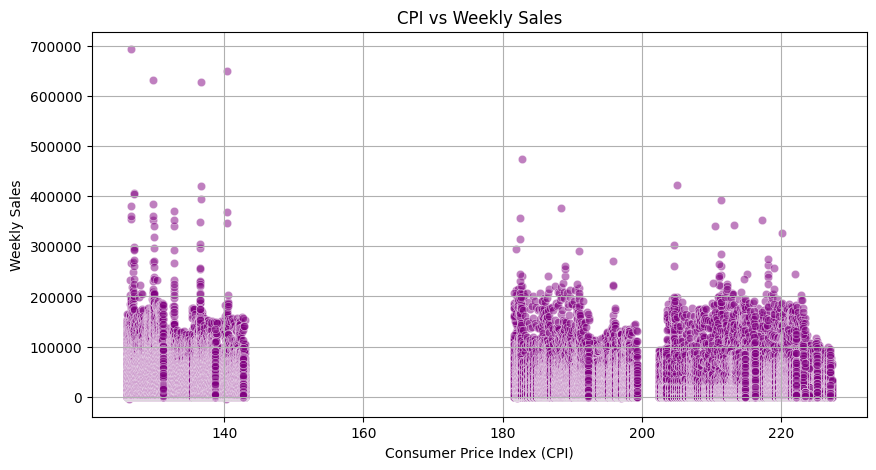

In [10]:
 # chart 6 - "CPI vs Weekly Sales"

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x='CPI', y='Weekly_Sales', alpha=0.5, color='purple')
plt.title("CPI vs Weekly Sales")
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


# Step 6: Feature Encoding & Selection


In [11]:
merged_df["IsHoliday"] = merged_df["IsHoliday"].astype(int)
merged_df = pd.get_dummies(merged_df, columns=["Type"], drop_first=True)
features = ["Store", "Dept", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size", 
            "IsHoliday", "Month", "Week", "Year", "Type_B", "Type_C"]
X = merged_df[features]
y = merged_df["Weekly_Sales"]

# Step 7: Train/Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model Training – Random Forest


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
joblib.dump(model, "random_forest_model.pkl")  
print("Model saved to random_forest_model.pkl")

Model saved to random_forest_model.pkl


# Step 9: Evaluation


In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
RMSE: 3619.50
MAE: 1428.06
R² Score: 0.9748


# Step 10: Feature Importance


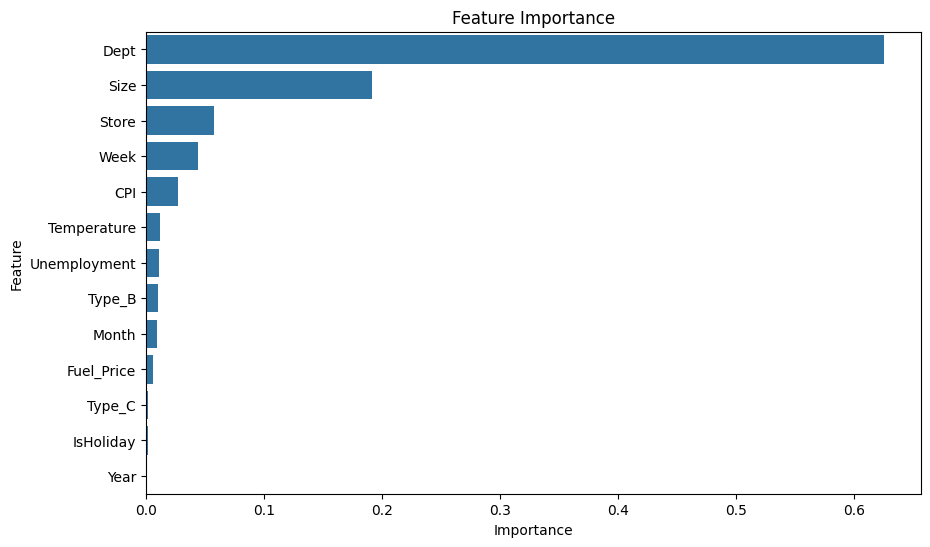

In [15]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# About the above chart:-
X-axis (Importance):
Think of this as the “impact score”—the higher it is, the more that feature moves the needle for your model’s performance. The math behind it (Gini impurity, mean squared error, all that jazz) just tells us which factors are really driving results.

Y-axis (Feature):
Every row here is one of your business variables. Maybe it’s “Store Type,” “Holiday,” “Sales Volume”—whatever data points you’ve got in play.

Bars:
Long bars signal major players. Short bars? Those features aren’t bringing much to the table.

Why This Matters for Business:
Quickly zero in on which features are actually influencing your predictions.
You can streamline your model by cutting out the dead weight—features with low importance.
There’s a good chance you’ll spot unexpected insights, like “Turns out, Store Size is a bigger deal than Promotion Days.”

# Step 11: Z-Score Anomaly Detection + Time Series Plot 


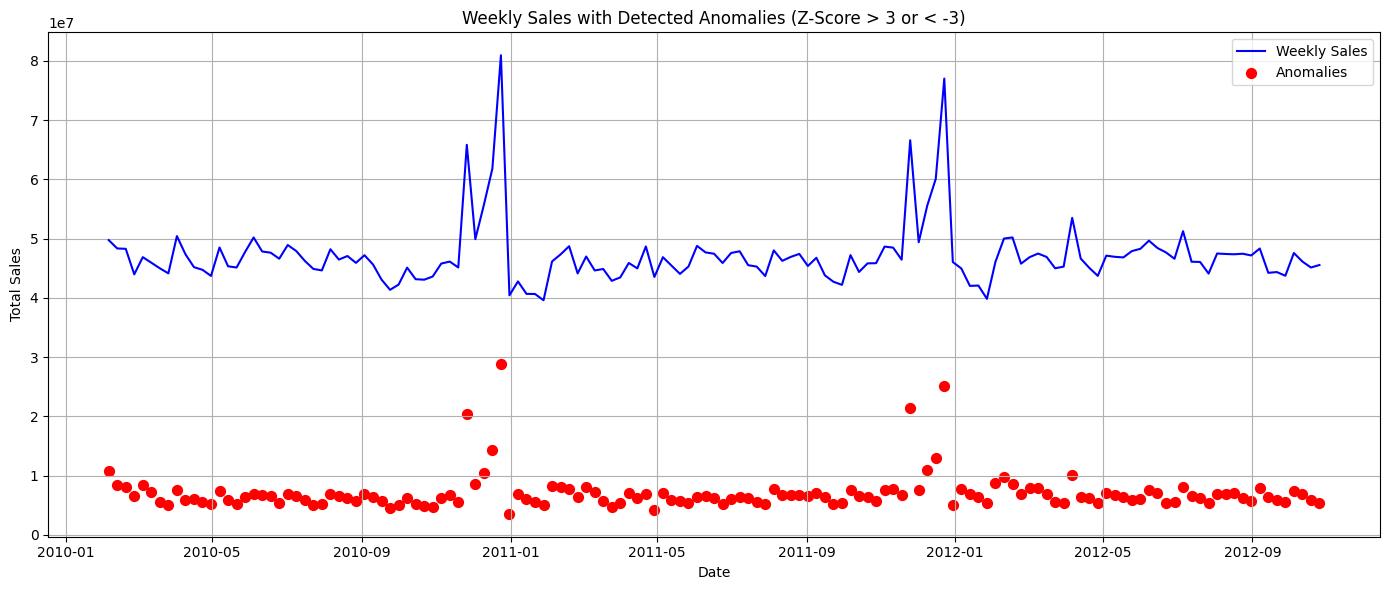

In [16]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Calculate Z-score
merged_df['Sales_zscore'] = zscore(merged_df['Weekly_Sales'])

# anomalies filter here 
anomalies = merged_df[(merged_df['Sales_zscore'].abs() > 3)]

# Aggregate the Weekly sales over time
sales_by_date = merged_df.groupby("Date")["Weekly_Sales"].sum().reset_index()
anomaly_points = anomalies.groupby("Date")["Weekly_Sales"].sum().reset_index()

# graph plot 
plt.figure(figsize=(14, 6))
plt.plot(sales_by_date["Date"], sales_by_date["Weekly_Sales"], label="Weekly Sales", color='blue')
plt.scatter(anomaly_points["Date"], anomaly_points["Weekly_Sales"], color='red', label="Anomalies", s=50)

# Z > 3 → unusually high sales
# Z < -3 → unusually low sales

plt.title("Weekly Sales with Detected Anomalies (Z-Score > 3 or < -3)")  
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# About the above chart:-

Chart Overview: Weekly Sales with Highlighted Anomalies

Here’s what you’re looking at: a line graph tracking weekly sales totals across all stores. The blue line? That’s your sales trend, week by week. Smooth sailing most of the time, but then you’ll see red dots. Those are the outliers—weeks where something out of the ordinary happened.

What’s with the Red Dots?
The red markers flag weeks where sales numbers seriously jumped or dropped—way outside the normal range. We use Z-scores here (think of it as a way to measure how unusual a week’s sales are compared to the average). If a week’s Z-score is above 3, that’s a huge spike—maybe a major promotion or holiday rush. If it’s below -3, sales took a nosedive—possibly due to store closures, supply issues, or just an off-season lull.

How the Process Works
- Z-score normalization checks how far each week’s sales stray from the average in standard deviation terms.
- Any week with a Z-score over 3 or under -3 gets flagged as an anomaly.
- The chart puts this all together, so you can quickly spot both trends and unusual activity.

Why This Matters
Spotting these anomalies is valuable. You get a heads-up on weeks worth investigating—maybe a campaign performed better than expected, or there was an operational hiccup. Knowing when and why sales patterns shift helps you fine-tune your forecasting and planning. Less guesswork, more data-driven decisions.


# Why Use Random Forest in Retail Analytics

* Manages Hard, Nonlinear Relationships:
-Retail sales rely on numerous interactive variables: store type, holiday calendar, promotions, location, etc.
-Random Forest extracts these nonlinearities and interactions without special feature engineering.

* Resilient to Noise and Outliers:
-Retail data will often include noisy sales figures and outliers (as you found with Z-scores).
-Random Forest is less affected by outliers than linear models or individual decision trees.

* Works Fine with Categorical and Numerical Data:
-It can natively work with both categories (e.g., Store Type = A/B/C and Store Area in sqft).

* Feature Importance Insight:
-As indicated in your feature importance plot, it informs you which factors most impact sales, providing business insight over sample prediction.

* Resistant to Overfitting:
-By averaging a multitude of decision trees learned from various data samples and features, Random Forest generalizes more than one tree.

* No Need for Scaling:
-Unlike other models such as SVM or Logistic Regression, feature scaling or normalization is not needed in Random Forest.

* Example Use Cases in Your Project:
-Predict Weekly Sales given store features and time-based features.
-Estimate Promotion Impact by training on with/without promo variables data.
-Understand Drivers of Store Performance (through feature importance scores).


#                                                         ** CONCLUSION OF THE PROJECT **

Conclusion: Integrated Retail Analysis for Storeletization
The project was able to illustrate how computer science and machine learning can be applied to engage with and contextualize the stores. By taking weekly sales data and discrete features (economic conditions affecting the store and store-unique characteristics), analysis provided several useful observations for the deployed model to evaluate features that measured the success of the store.

The key takeaways are as follows:
* The sales itinerary patterns vary with shop types and sizes (where large shops and counting some shop types) improved like there was no tomorrow.
* Periods where holiday and outside finance influenced (these included fuel prices or unemployment) alternative week sales.
* Better performance from the random forest line regression: the random forest identified the complexity of the trajectory and maintained interpretable values.
* This modelling also reliably demonstrated that the size of the store, fuel price and unemployment were amongst predictors that judged sales.
* Insight was valuable to add that could detect an actual deviation: the z-score-based detection flagged the weeks that registered unusually high or low sales that highlight profound events (for example, outbreaks or interruptions).

Model General:
* The final model can help calculate future sales in addition to planning inventory and store logistics under different conditions.
* The Business Impact:
* The project has provided reseller with a computer generated:
• Target market and advertising
• Inventory Scheme
• Resource allocation position to shops